# Lesson 6.4

## Load Data

In [1]:
# Load the data
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Goal: Use data to find Pedal Length
## Supervised because we have the Petal Length in our dataset


# Linear Regression: Use pedal width to get petal length

In [85]:
## Create training and testing sets
## y = petal Length
Y = data.iloc[:,3].values

## x = pedal width
X = data.iloc[:,4].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

print(model.intercept_)
print(model.coef_)

1.0813364660189517
[2.22642844]


### What does this look like graphically?

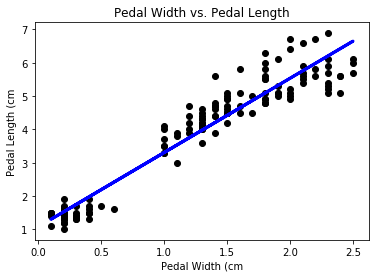

In [86]:
new_y = model.predict(X)

plt.scatter(data['PetalWidthCm'], data['PetalLengthCm'],color='black')
plt.title("Pedal Width vs. Pedal Length")
plt.xlabel("Pedal Width (cm")
plt.ylabel("Pedal Length (cm")
plt.plot(X, new_y, color='blue', linewidth=3)
plt.show()

### Evaluating Model's Performance

In [87]:
y_pred = model.predict(X_test)
print(y_pred)

print(y_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[5.53419334 3.97569344 6.20212188 1.52662215 4.19833628 5.3115505
 6.20212188 4.42097912 4.19833628 5.3115505  1.30397931 3.53040775
 3.97569344 5.97947903 1.30397931 1.749265   1.52662215 1.52662215
 6.64740756 4.42097912 4.42097912 5.75683619 2.41719353 3.97569344
 3.97569344 5.08890766 4.19833628 1.52662215 5.53419334 1.97190784]
[5.2 4.2 5.2 1.3 5.6 6.1 5.7 4.9 4.6 5.  1.4 3.9 4.4 5.8 1.5 1.3 1.3 1.5
 6.1 4.5 4.7 6.6 1.6 4.3 4.6 4.8 4.7 1.6 5.1 1.5]
Mean Absolute Error: 0.43080376162020584
Mean Squared Error: 0.2734484995730649
Root Mean Squared Error: 0.5229230340815605


# Multivariate Linear Regression

In [88]:

## Create training and testing sets
## y = petal Length
Y = data.iloc[:,3].values

## x = All other columns (why can't we use species?)
X = data.iloc[:,[0,1,2,4]].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

print(model.intercept_)
print(model.coef_)

-0.33172463335685
[ 1.35493179e-03  7.10362936e-01 -6.16718381e-01  1.42209295e+00]


### Evaluating Model's Performance

In [89]:
y_pred = model.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2469978925392081
Mean Squared Error: 0.12346659898809759
Root Mean Squared Error: 0.3513781424449984


# Polynomail Regression

## Id vs Sepal Width looks polynomail (degree 2) 

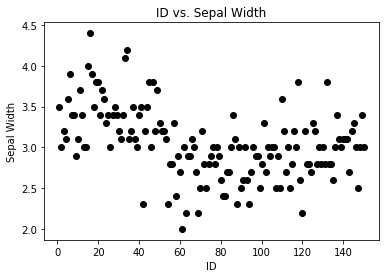

In [90]:
plt.scatter(data['Id'],data['SepalWidthCm'],color='black')
plt.title("ID vs. Sepal Width")
plt.xlabel("ID")
plt.ylabel("Sepal Width")
plt.show()

## Modelling with Linear Regression does not do well

3.3104844587459636
[-0.00343359]


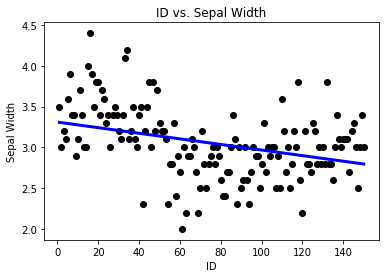

Mean Absolute Error: 0.2969543167083065
Mean Squared Error: 0.14899438887002164
Root Mean Squared Error: 0.3859979130384278


In [91]:
## Create training and testing sets
## y = Sepal Width
Y = data.iloc[:,2].values

## x = Id
X = data.iloc[:,0].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

print(model.intercept_)
print(model.coef_)

new_Y = model.predict(X)
plt.scatter(data['Id'],data['SepalWidthCm'],color='black')
plt.title("ID vs. Sepal Width")
plt.xlabel("ID")
plt.ylabel("Sepal Width")
plt.plot(X, new_Y, color='blue', linewidth=3)
plt.show()

y_pred = model.predict(X_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

## Model with Poly Regression

In [94]:
## Create training and testing sets
## y = Sepal Width
Y = data.iloc[:,2].values

## x = Id
X = data.iloc[:,0].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree = 2)
X_TRANSF = polynomial_features.fit_transform(X_train)
model = LinearRegression()
model.fit(X_TRANSF, y_train)


print(model.intercept_)
print(model.coef_)

3.733449270947633
[ 0.00000000e+00 -1.88551471e-02  9.69254766e-05]


### Evaluating Model's Performance

In [95]:
X_Test_TRANSF = polynomial_features.fit_transform(X_test)
y_pred = model.predict(X_Test_TRANSF)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2815883378015725
Mean Squared Error: 0.12248289403631236
Root Mean Squared Error: 0.34997556205585606


### What does this look like graphically?

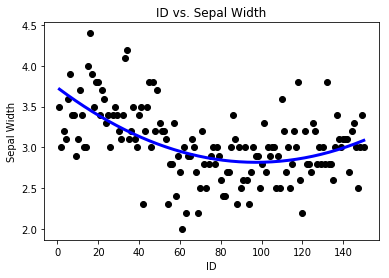

In [96]:
All_X = polynomial_features.fit_transform(X)
new_y = model.predict(All_X)

plt.scatter(data['Id'],data['SepalWidthCm'],color='black')
plt.title("ID vs. Sepal Width")
plt.xlabel("ID")
plt.ylabel("Sepal Width")
plt.plot(X, new_y, color='blue', linewidth=3)
plt.show()

# Conclusion

#### Everything is a trade off!  Having more variables in our linear regression gives a closer model but can take longer to train.  Using Polynomial vs Linear Regression can give a closer model but can take longer to train and could overfit.